<a href="https://colab.research.google.com/github/steffiangel/DL_AIML/blob/main/2348510_LAB_TEST1_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
def CF(s,d):
  return 0.1*s**2+0.5*d
def CFd(s, d):
    return 0.2 * s
def Td(s, d):
    return -d / (s ** 2) + 0.1
def T(s,d):
  return (d/s)+0.1*d

mom=0.9
s=50
d=100
lr=0.01
vel1,vel2=0,0

def sgd_with_momentum(s, d, mom, lr):
    vel1, vel2 = 0, 0
    for i in range(5):
        c = CFd(s, d)
        t = Td(s, d)
        vel1 = mom * vel1 - lr * c
        vel2 = mom * vel2 - lr * t
        s = s - vel1
        d = d - vel2
        print('Iteration', i+1, 'speed:', s, 'distance:', d)


def sgd_without_momentum(s, d, lr):
    for i in range(5):
        c = CFd(s, d)
        t = Td(s, d)
        vel1 = -lr * c
        vel2 = -lr * t
        s = s - vel1
        d = d - vel2
        print('Iteration', i+1, 'speed:', s, 'distance:', d)




In [ ]:
sgd_without_momentum(s, d, lr)

Iteration 1 speed: 50.1 distance: 100.0006
Iteration 2 speed: 50.2002 distance: 100.00120159282234
Iteration 3 speed: 50.3006004 distance: 100.001804772118
Iteration 4 speed: 50.4012016008 distance: 100.00240953156334
Iteration 5 speed: 50.5020040040016 distance: 100.00301586485995


In [ ]:
sgd_with_momentum(s, d,mom, lr)

Iteration 1 speed: 50.1 distance: 100.0006
Iteration 2 speed: 50.2902 distance: 100.00174159282234
Iteration 3 speed: 50.5619604 distance: 100.00337362256312
Iteration 4 speed: 50.90766868079999 distance: 100.00545127815636
Iteration 5 speed: 51.32062147088159 distance: 100.0079352837599


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/GME_stock - GME_stock.csv')

In [ ]:
df.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300,65.010002


In [ ]:
df=df.drop(['date'],axis=1)

In [ ]:
df.head()

,open_price,high_price,low_price,close_price,volume,adjclose_price
0,265.000000,483.000000,112.250000,193.600006,58815800,193.600006
1,354.829987,380.000000,249.000000,347.510010,93396700,347.510010
2,88.559998,150.000000,80.199997,147.979996,178588000,147.979996
3,96.730003,159.179993,61.130001,76.790001,177874000,76.790001
4,42.590000,76.760002,42.320000,65.010002,196784300,65.010002


In [ ]:
df.isnull().sum()

open_price        0
high_price        0
low_price         0
close_price       0
volume            0
adjclose_price    0
dtype: int64

<Axes: >

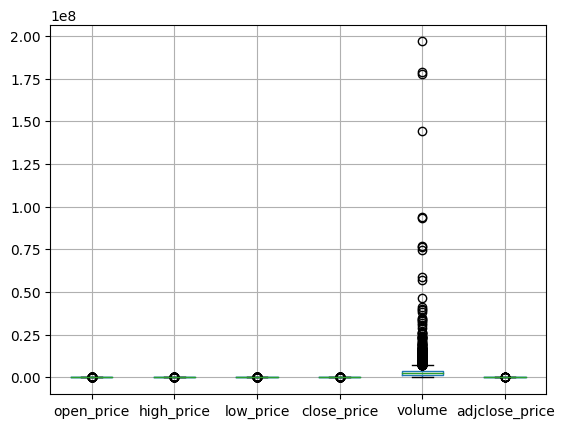

In [ ]:
df.boxplot()

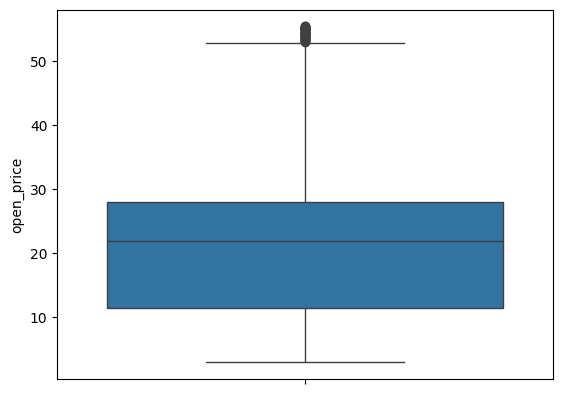

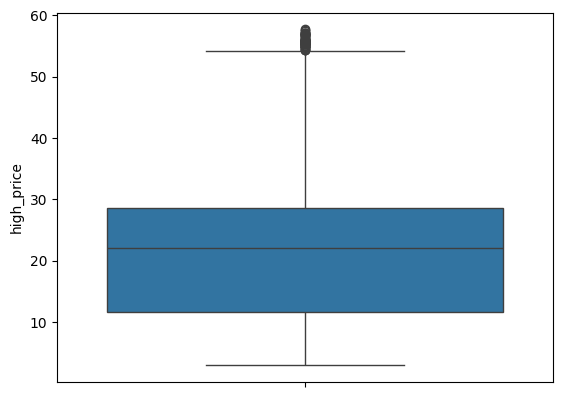

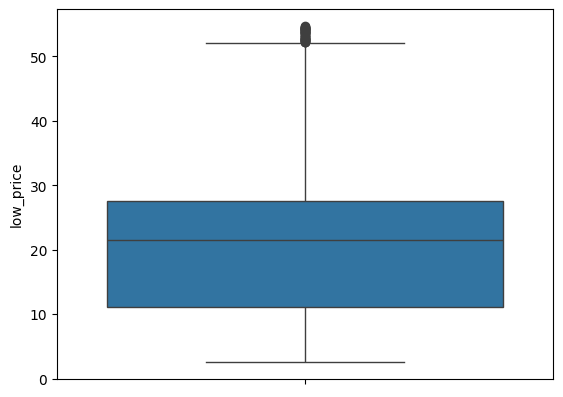

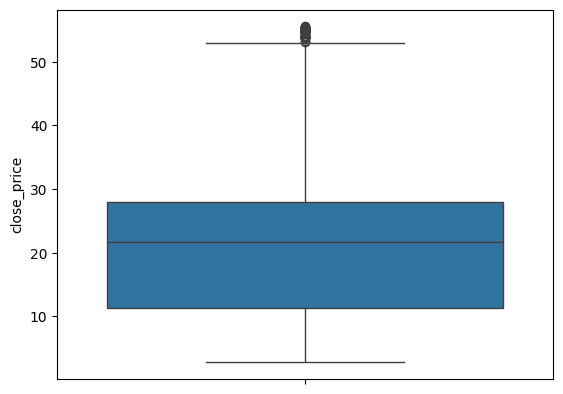

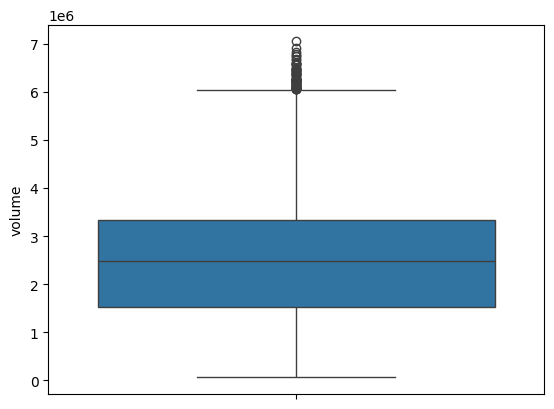

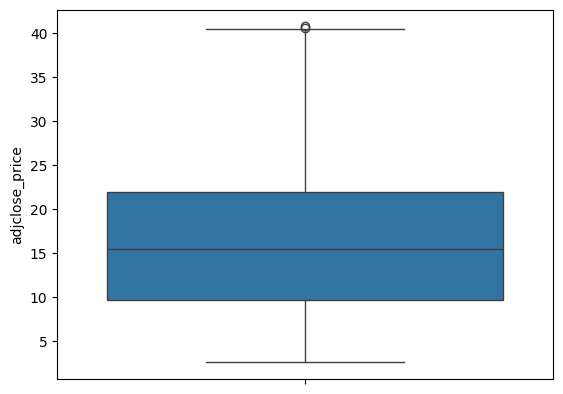

In [ ]:

for col in df.columns:
  for i in df[col]:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    if i>upper or i<lower:
          df[col]= df[col].replace(i,np.median(df[col]))
  sns.boxplot(df[col])

  plt.show()

In [ ]:
df.describe()

,open_price,high_price,low_price,close_price,volume,adjclose_price
count,4773.000000,4773.000000,4773.000000,4773.000000,4.773000e+03,4773.000000
mean,21.913221,22.370244,21.628449,21.990843,2.427251e+06,16.643021
std,11.881763,12.153216,11.821889,11.981069,1.294650e+06,9.229384
min,2.850000,2.940000,2.570000,2.800000,6.500000e+04,2.555174
25%,11.360000,11.575000,11.130000,11.350000,1.528900e+06,9.607993
50%,21.760000,22.110001,21.430000,21.760000,2.491800e+06,15.479172
75%,27.360001,27.860001,27.000000,27.440001,3.218000e+06,21.956852
max,51.540001,53.330002,51.810001,52.439999,6.056200e+06,40.513126


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   open_price      4773 non-null   float64
 1   high_price      4773 non-null   float64
 2   low_price       4773 non-null   float64
 3   close_price     4773 non-null   float64
 4   volume          4773 non-null   int64  
 5   adjclose_price  4773 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 223.9 KB


Text(0.5, 1.0, 'No. of missing values')

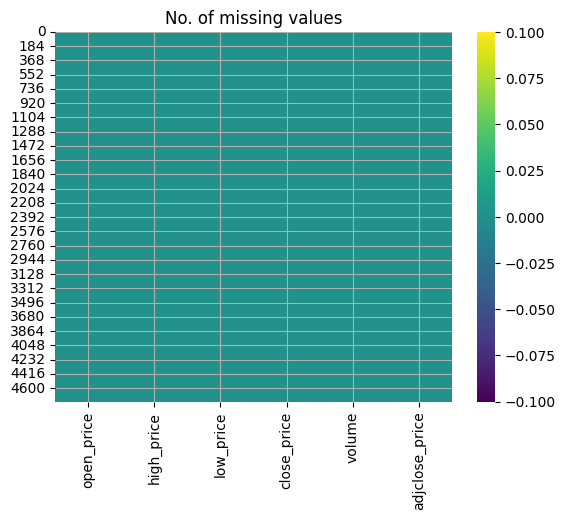

In [ ]:
sns.heatmap(df.isnull(),cmap='viridis')
plt.grid()
plt.title('No. of missing values')

In [ ]:
X=df.drop(['adjclose_price'],axis=1)
Y=df['adjclose_price']

In [ ]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)


X_test = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape[1]

5

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from sklearn.linear_model import ElasticNet
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.layers import Dropout

input_shape = X_train.shape[1]

def combined_regularizer(l1=0.01, l2=0.01):
    return l1_l2(l1=l1, l2=l2)

model = Sequential()
model.add(Dense(10, activation='relu', kernel_regularizer=L1(0.01), input_shape=(input_shape,)))
model.add(Dropout(0.2))
model.add(Dense(7, activation='relu', kernel_regularizer=L2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(4, activation='sigmoid', kernel_regularizer=combined_regularizer()))
model.add(Dropout(0.2))

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

test_loss, test_ac = model.evaluate(X_test, y_test)

print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_ac}')


Epoch 1/10
96/96 [==============================] - 3s 7ms/step - loss: -17.0602 - accuracy: 0.0000e+00 - val_loss: -117.5965 - val_accuracy: 0.0000e+00
Epoch 2/10
96/96 [==============================] - 0s 5ms/step - loss: -16.0297 - accuracy: 0.0000e+00 - val_loss: -117.6861 - val_accuracy: 0.0000e+00
Epoch 3/10
96/96 [==============================] - 0s 4ms/step - loss: -13.1850 - accuracy: 0.0000e+00 - val_loss: -117.7529 - val_accuracy: 0.0000e+00
Epoch 4/10
96/96 [==============================] - 0s 3ms/step - loss: -3.5095 - accuracy: 0.0000e+00 - val_loss: -117.7989 - val_accuracy: 0.0000e+00
Epoch 5/10
96/96 [==============================] - 0s 3ms/step - loss: 0.6072 - accuracy: 0.0000e+00 - val_loss: -117.8331 - val_accuracy: 0.0000e+00
Epoch 6/10
96/96 [==============================] - 0s 3ms/step - loss: 15.3202 - accuracy: 0.0000e+00 - val_loss: -117.8558 - val_accuracy: 0.0000e+00
Epoch 7/10
96/96 [==============================] - 0s 3ms/step - loss: -9.8115 - accu

In [ ]:
y_pred=model.predict(X_test)
y_pred_bi=model.predict(y_pred<0.5)
accuracy=y_pred(y_test)

30/30 [==============================] - 0s 1ms/step


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_16" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 4)
